<a href="https://colab.research.google.com/github/Daivar/Behavior_Sequence_Transformer_Pytorch/blob/main/Orders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(8,4)})
sns.set(font_scale=1.3)
plt.style.use('fivethirtyeight')
import datetime
from calendar import monthrange
from collections import defaultdict 

In [8]:
df1= pd.read_csv("sample_orders.csv", infer_datetime_format=True, parse_dates=['Day'], index_col=['Day'])

In [9]:
df1.sample(10)

,Country,City,OrderForCompany,OrderID,Revenue,ProductsCount
Day,,,,,,
2019-03-26,AA,B,False,15M3FNO437U4MJL,81.91,50
2019-03-16,AA,A,False,BHW0M40SZ6U444N,87.41,60
2019-08-03,AA,A,False,H0OIE33078U4SWT,45.98,36
2019-01-05,BB,D,False,6JC5VJWRE6U4LRR,101.66,52
2019-05-21,AA,C,False,G044P2QAK7U40ZB,44.43,33
2019-08-06,BB,D,False,38CGAT2388U4YKG,68.13,60
2019-04-17,BB,D,False,O9DU1ZAT97U461X,54.71,32
2019-01-07,AA,C,False,9H4TVC7HF6U4CKW,43.80,20
2019-04-11,CC,E,False,J7LTFR6187U41BR,59.36,41


In [ ]:
df1.shape

(208000, 6)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 208000 entries, 2019-01-22 to 2019-06-05
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Country          208000 non-null  object 
 1   City             208000 non-null  object 
 2   OrderForCompany  208000 non-null  bool   
 3   OrderID          208000 non-null  object 
 4   Revenue          208000 non-null  float64
 5   ProductsCount    208000 non-null  int64  
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 9.7+ MB


In [ ]:
df1.isna().mean()

Country            0.0
City               0.0
OrderForCompany    0.0
OrderID            0.0
Revenue            0.0
ProductsCount      0.0
dtype: float64

In [ ]:
df1.describe()

,Revenue,ProductsCount
count,208000.000000,208000.000000
mean,65.609920,38.165639
std,26.538433,13.000156
min,20.560000,13.000000
25%,48.020000,29.000000
50%,62.200000,36.000000
75%,75.090000,45.000000
max,2945.620000,215.000000


False    194247
True      13753
Name: OrderForCompany, dtype: int64

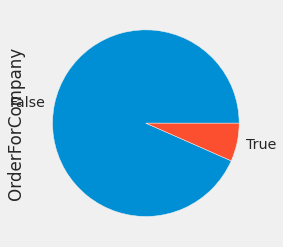

In [ ]:
df = df1['OrderForCompany'].value_counts()
df.plot.pie()
df

In [57]:
df2 = df1.groupby(['Country', 'OrderForCompany']).resample('BM').mean()
df2

OrderForCompany     Revenue  ProductsCount
Country OrderForCompany Day                                                   
AA      False           2019-01-31              0.0   60.618307      37.198948
                        2019-02-28              0.0   61.001947      37.103863
                        2019-03-29              0.0   60.875808      37.056318
                        2019-04-30              0.0   61.960526      37.033566
                        2019-05-31              0.0   61.877176      36.823735
                        2019-06-28              0.0   62.582786      36.542511
                        2019-07-31              0.0   62.242515      36.113587
                        2019-08-30              0.0   62.542085      35.960911
        True            2019-01-31              1.0   77.431064      32.823615
                        2019-02-28              1.0   78.870772      33.233048
                        2019-03-29              1.0   75.471238      31.604762
                        2019-04-30              1.0   77.572354      32.339467
                        2019-05-31              1.0   79.793528      32.048678
                        2019-06-28              1.0   77.127316      31.318976
                        2019-07-31              1.0   81.256329      32.852055
                        2019-08-30              1.0   76.331476      31.273973
BB      False           2019-01-31              0.0   68.500696      42.451546
                        2019-02-28              0.0   69.324751      42.917438
                        2019-03-29              0.0   68.789604      42.139427
                        2019-04-30              0.0   69.309236      42.094581
                        2019-05-31              0.0   70.100018      42.321447
                        2019-06-28              0.0   67.999150      40.635097
                        2019-07-31              0.0   67.856385      41.009293
                        2019-08-30              0.0   70.262426      41.839146
        True            2019-01-31              1.0   80.860917      35.558333
                        2019-02-28              1.0   82.666964      35.589286
                        2019-03-29              1.0   83.741140      35.061404
                        2019-04-30              1.0   84.653106      36.223602
                        2019-05-31              1.0   87.133385      38.000000
                        2019-06-28              1.0   87.754634      35.878049
                        2019-07-31              1.0   88.393121      36.643312
                        2019-08-30              1.0   86.346899      37.588608
CC      False           2019-01-31              0.0   81.696124      48.763023
                        2019-02-28              0.0   84.044755      49.467280
                        2019-03-29              0.0   84.065060      49.602829
                        2019-04-30              0.0   83.231030      48.915493
                        2019-05-31              0.0   83.903670      48.681677
                        2019-06-28              0.0   84.764112      48.988017
                        2019-07-31              0.0   83.740563      48.708786
                        2019-08-30              0.0   86.113124      49.549332
        True            2019-01-31              1.0   91.274762      40.285714
                        2019-02-28              1.0   89.325682      38.704545
                        2019-03-29              1.0   87.204318      38.863636
                        2019-04-30              1.0   87.162373      38.372881
                        2019-05-31              1.0   90.842794      39.867647
                        2019-06-28              1.0   86.188814      43.932203
                        2019-07-31              1.0   90.160000      42.329114
                        2019-08-30              1.0  104.860000      46.018519

In [53]:
df2 = df1.groupby(['Country', 'OrderForCompany']).Revenue.sum()
df2

Country  OrderForCompany
AA       False              9121861.25
         True                951989.95
BB       False              2131643.75
         True                 95377.28
CC       False              1305200.14
         True                 40790.97
Name: Revenue, dtype: float64

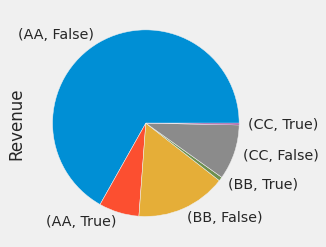

In [ ]:
df2.plot.pie()

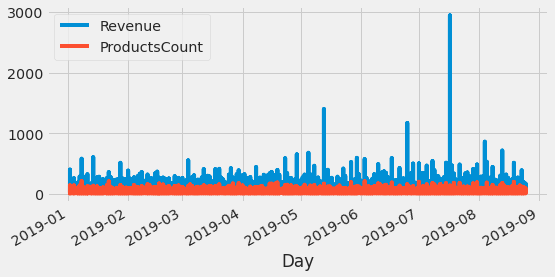

In [ ]:
df1.plot()


In [79]:
df5 = pd.DataFrame(df1, columns=['Country', 'City', 'Revenue'])
df8 = df5.groupby('Country').resample('BM').mean()
df8

Revenue
Country Day                  
AA      2019-01-31  61.771662
        2019-02-28  62.148232
        2019-03-29  61.852921
        2019-04-30  63.122255
        2019-05-31  63.367816
        2019-06-28  63.819994
        2019-07-31  63.881869
        2019-08-30  63.649373
BB      2019-01-31  68.871503
        2019-02-28  69.698333
        2019-03-29  69.240643
        2019-04-30  69.894492
        2019-05-31  70.653602
        2019-06-28  68.862203
        2019-07-31  68.615751
        2019-08-30  70.897762
CC      2019-01-31  81.897275
        2019-02-28  84.160935
        2019-03-29  84.138454
        2019-04-30  83.340543
        2019-05-31  84.139600
        2019-06-28  84.808470
        2019-07-31  83.981482
        2019-08-30  86.619290

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f01a4e5d310>,
      dtype=object)

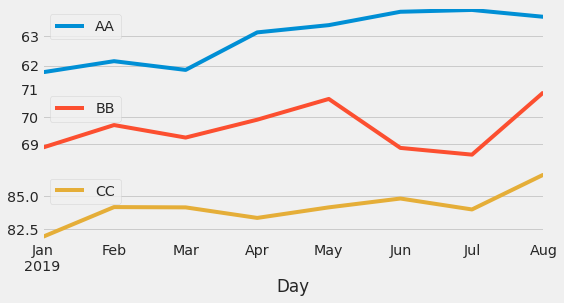

In [80]:
pd.pivot_table(df8.reset_index(),
               index='Day', columns='Country', values='Revenue'
              ).plot(subplots=True)

In [21]:
df9 = df1.groupby('City').resample('BM').mean()
df9

OrderForCompany    Revenue  ProductsCount
City Day                                                  
A    2019-01-31         0.092633  64.964937      38.102823
     2019-02-28         0.083516  64.955249      37.787156
     2019-03-29         0.086827  64.328521      37.489343
     2019-04-30         0.095289  65.599861      37.455185
     2019-05-31         0.106799  66.307697      37.287135
     2019-06-28         0.108172  66.238564      36.792620
     2019-07-31         0.109955  66.211933      36.459842
     2019-08-30         0.099604  65.722371      36.206800
B    2019-01-31         0.036352  57.786303      35.405422
     2019-02-28         0.036868  58.229614      35.486445
     2019-03-29         0.042669  58.483572      35.517476
     2019-04-30         0.048180  59.894233      35.580025
     2019-05-31         0.051143  58.993145      35.183460
     2019-06-28         0.054924  60.327015      35.007339
     2019-07-31         0.055603  60.247250      34.867110
     2019-08-30         0.059283  60.108741      34.540901
C    2019-01-31         0.027224  55.812444      34.637544
     2019-02-28         0.027160  56.732595      35.161649
     2019-03-29         0.026289  57.304446      35.355578
     2019-04-30         0.029691  57.984065      35.233242
     2019-05-31         0.037910  58.283724      34.882765
     2019-06-28         0.040731  59.638643      35.016677
     2019-07-31         0.042988  60.425537      34.884739
     2019-08-30         0.039943  60.898170      34.735127
D    2019-01-31         0.030000  68.871503      42.244750
     2019-02-28         0.028000  69.698333      42.712250
     2019-03-29         0.030167  69.240643      41.925906
     2019-04-30         0.038143  69.894492      41.870647
     2019-05-31         0.032500  70.653602      42.181000
     2019-06-28         0.043687  68.862203      40.427278
     2019-07-31         0.036976  68.615751      40.847857
     2019-08-30         0.039500  70.897762      41.671250
E    2019-01-31         0.021000  81.897275      48.585000
     2019-02-28         0.022000  84.160935      49.230500
     2019-03-29         0.023379  84.138454      49.351753
     2019-04-30         0.027856  83.340543      48.621813
     2019-05-31         0.034000  84.139600      48.382000
     2019-06-28         0.031135  84.808470      48.830607
     2019-07-31         0.037530  83.981482      48.469359
     2019-08-30         0.027000  86.619290      49.454000

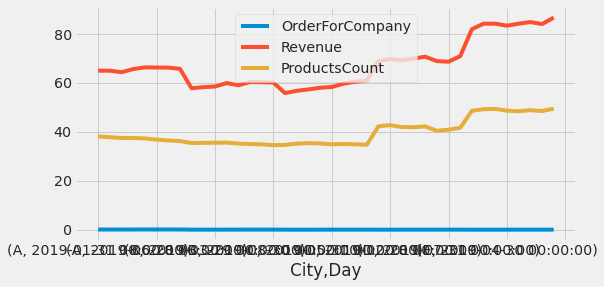

In [50]:
df9.plot()

In [23]:
df10 = df1.groupby('City').resample('BM').max()
df10

Country City  ...  Revenue ProductsCount
City Day                      ...                       
A    2019-01-31      AA    A  ...   583.88           215
     2019-02-28      AA    A  ...   388.75           177
     2019-03-29      AA    A  ...   557.76           177
     2019-04-30      AA    A  ...   656.49           193
     2019-05-31      AA    A  ...  1403.25           198
     2019-06-28      AA    A  ...  1172.97           213
     2019-07-31      AA    A  ...  2945.62           204
     2019-08-30      AA    A  ...   718.97           203
B    2019-01-31      AA    B  ...   328.53           131
     2019-02-28      AA    B  ...   371.38           123
     2019-03-29      AA    B  ...   276.62           120
     2019-04-30      AA    B  ...   317.78           122
     2019-05-31      AA    B  ...   356.14           121
     2019-06-28      AA    B  ...   265.12           112
     2019-07-31      AA    B  ...   350.78           142
     2019-08-30      AA    B  ...   276.77           107
C    2019-01-31      AA    C  ...   297.04           105
     2019-02-28      AA    C  ...   298.78           103
     2019-03-29      AA    C  ...   225.07            98
     2019-04-30      AA    C  ...   218.02           108
     2019-05-31      AA    C  ...   401.59           113
     2019-06-28      AA    C  ...   280.42           127
     2019-07-31      AA    C  ...   279.89           110
     2019-08-30      AA    C  ...   291.47           119
D    2019-01-31      BB    D  ...   250.45           133
     2019-02-28      BB    D  ...   270.81           123
     2019-03-29      BB    D  ...   428.54            96
     2019-04-30      BB    D  ...   347.96           177
     2019-05-31      BB    D  ...   376.28           113
     2019-06-28      BB    D  ...   429.53           117
     2019-07-31      BB    D  ...   386.24           137
     2019-08-30      BB    D  ...   864.59           145
E    2019-01-31      CC    E  ...   609.37           131
     2019-02-28      CC    E  ...   265.86           112
     2019-03-29      CC    E  ...   312.03           162
     2019-04-30      CC    E  ...   333.20           123
     2019-05-31      CC    E  ...   681.67           128
     2019-06-28      CC    E  ...   500.88           155
     2019-07-31      CC    E  ...   341.22           187
     2019-08-30      CC    E  ...   448.40           152

[40 rows x 6 columns]

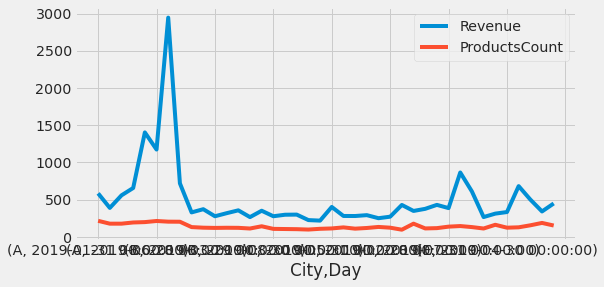

In [28]:
df10.plot()



In [12]:
df7 = df1.groupby(['Country']).min()
df7

,City,OrderForCompany,OrderID,Revenue,ProductsCount
Country,,,,,
AA,A,False,00070WI538U4Z36,20.56,13
BB,D,False,0011TVG5F6U4T8D,30.14,19
CC,E,False,003A1TNV38U41T4,42.06,25


In [ ]:
df4 = df1.groupby(['Country', 'City', 'OrderForCompany']).Revenue.max()
df4

Country  City  OrderForCompany
AA       A     False               598.49
               True               2945.62
         B     False               371.38
               True                356.14
         C     False               401.59
               True                252.69
BB       D     False               864.59
               True                429.53
CC       E     False               681.67
               True                448.40
Name: Revenue, dtype: float64

In [ ]:
df1_month = df1.resample('BM').max()
df1_month

,Country,City,OrderForCompany,OrderID,Revenue,ProductsCount
Day,,,,,,
2019-01-31,CC,E,True,ZZY4LDO4K6U4CTW,609.37,215
2019-02-28,CC,E,True,ZZYNE0RSO6U41LP,388.75,177
2019-03-29,CC,E,True,ZZZYIB0A07U4ALB,557.76,177
2019-04-30,CC,E,True,ZZZUAFKHD7U4J7S,656.49,193
2019-05-31,CC,E,True,ZZY7NM8RJ7U42LU,1403.25,198
2019-06-28,CC,E,True,ZZZ1JFXRT7U4WPE,1172.97,213
2019-07-31,CC,E,True,ZZYU9IFI38U43XP,2945.62,204
2019-08-30,CC,E,True,ZZYTL0C688U4E42,864.59,203


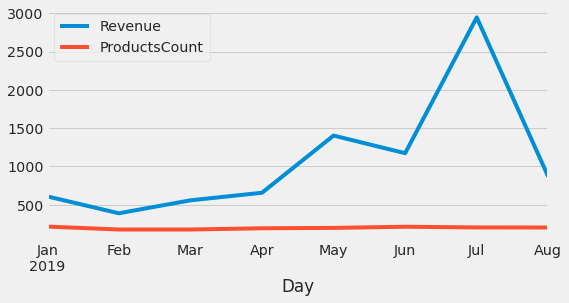

In [ ]:
df1_month.plot()

In [ ]:
df1_month = df1.resample('BM').mean()
df1_month

,OrderForCompany,Revenue,ProductsCount
Day,,,
2019-01-31,0.059000,64.412070,38.620192
2019-02-28,0.055346,65.003071,38.708500
2019-03-29,0.057920,64.706428,38.472592
2019-04-30,0.065266,65.717209,38.398612
2019-05-31,0.071615,66.086536,38.231423
2019-06-28,0.074545,66.217740,37.747529
2019-07-31,0.074896,66.149830,37.572934
2019-08-30,0.069923,66.531427,37.587846


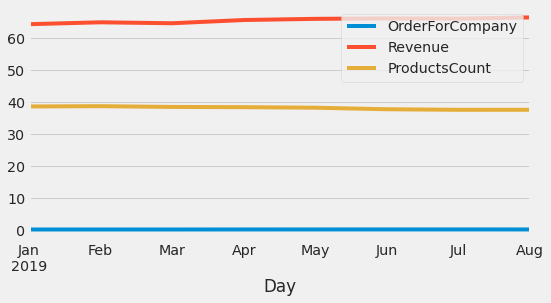

In [ ]:
df1_month.plot()

In [ ]:
df1_month = df1.resample('BM').sum()
df1_month

,OrderForCompany,Revenue,ProductsCount
Day,,,
2019-01-31,1534,1674713.81,1004125
2019-02-28,1439,1690079.84,1006421
2019-03-29,1418,1584142.78,941886
2019-04-30,1796,1808406.15,1056653
2019-05-31,1862,1718249.93,994017
2019-06-28,1825,1621142.70,924135
2019-07-31,2061,1820311.03,1033932
2019-08-30,1818,1729817.10,977284


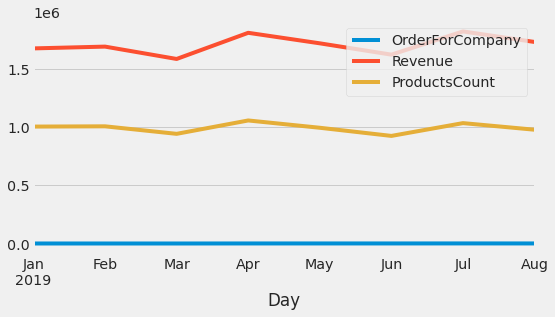

In [ ]:
df1_month.plot()

In [ ]:
customers = df1.groupby(['Country']).sum()
customers

,OrderForCompany,Revenue,ProductsCount
Country,,,
AA,12188,10073851.20,5821112
BB,1116,2227021.03,1335615
CC,449,1345991.11,781726


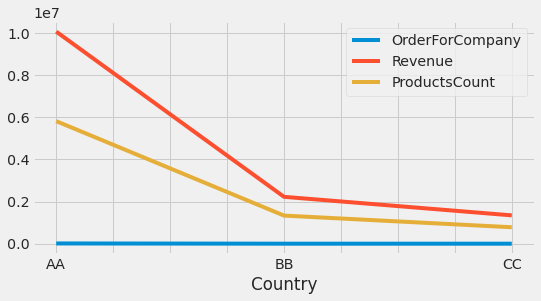

In [ ]:
customers.plot()

In [ ]:
customers = df1.groupby(['Country', 'City']).sum()
customers

OrderForCompany     Revenue  ProductsCount
Country City                                            
AA      A                9545  6390623.23        3626252
        B                1752  2165305.13        1286844
        C                 891  1517922.84         908016
BB      D                1116  2227021.03        1335615
CC      E                 449  1345991.11         781726

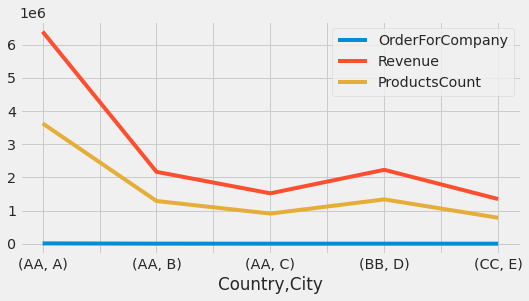

In [ ]:
customers.plot()

In [ ]:
customers = df1.groupby(['Country','City']).mean()
customers

OrderForCompany    Revenue  ProductsCount
Country City                                           
AA      A            0.097906  65.550904      37.195762
        B            0.047933  59.240654      35.206807
        C            0.034325  58.476109      34.980199
BB      D            0.034875  69.594407      41.737969
CC      E            0.028063  84.124444      48.857875

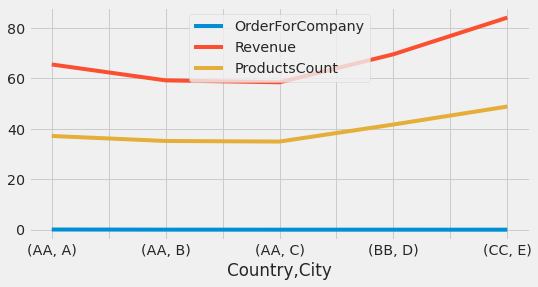

In [ ]:
customers.plot()